In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor  # Assuming you want to use MLP

# Load the data
try: 
    bmw_data = pd.read_csv('./Data/bmw.csv')
except FileNotFoundError:
    print("File not found")
    exit(1)

# Assuming 'price' is the target variable (modify if needed)
y = bmw_data['price'] if 'price' in bmw_data.columns else bmw_data.iloc[:, -1]

# All columns except the target
X = bmw_data.drop(y.name, axis=1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Create an MLPRegressor (you can replace this with your desired model)
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

categorical_cols = ['model', 'transmission', 'fuelType']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Create preprocessing steps for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline that preprocesses the data and then applies the MLP model
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("mlp", mlp),
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Evaluate the model on test data
score = pipe.score(X_test, y_test)
print(f"\nR² score on test data: {score:.4f}")

# Make predictions
y_pred = pipe.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# If you want to use the pipeline for new data:
# predictions = pipe.predict(new_data)

First 10 rows of the dataset:
       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   
5   5 Series  2016  14900    Automatic    35309   Diesel  125  60.1   
6   5 Series  2017  16000    Automatic    38538   Diesel  125  60.1   
7   2 Series  2018  16250       Manual    10401   Petrol  145  52.3   
8   4 Series  2017  14250       Manual    42668   Diesel   30  62.8   
9   5 Series  2016  14250    Automatic    36099   Diesel   20  68.9   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0  
5         2.0  
6         2.0  
7         1.5  
8         2.0  
9         2.0  

Dataset inf

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Script execution started at: 2025-04-29 14:48:23.983223

Data loaded successfully.
Initial dataset shape: (10781, 9)

--- Cleaning Engine Size ---
Found 33 Hybrid cars with engineSize == 0.0.
Imputing with median engine size: 2.00

--- Checking MPG ---
Info: Found 43 cars with MPG > 200. (Likely Electric/PHEV).

--- Feature Engineering: Adding car_age ---
'car_age' feature added.

--- Attempting to Remove Specific Outlier Rows by Index ---
Target indices for removal: [6451, 5362, 2909, 7085]
Found 4 target index/indices: [6451, 5362, 2909, 7085]
4 row(s) removed. New dataset shape: (10777, 10)

--- Feature Engineering: Adding Performance Flags ---
'is_M_model' and 'is_i8' features added.

--- Applying Log Transform to Target ('price') ---

--- Final Feature Set ---
Categorical Features (3): ['model', 'transmission', 'fuelType']
Numerical Features (8): ['car_age', 'engineSize', 'is_M_model', 'is_i8', 'mileage', 'mpg', 'tax', 'year']

--- Data Split ---
Training set shape: X=(8621, 11), 

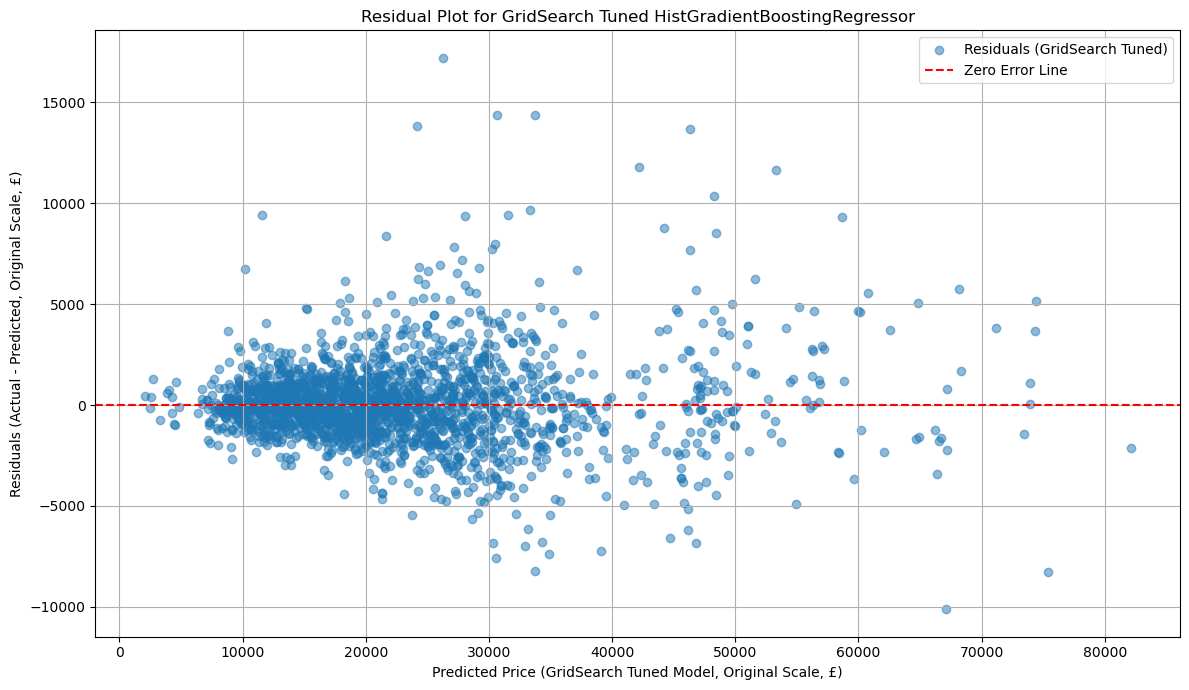


--- Top 15 Cars with Largest Prediction Errors (GridSearch Tuned Model, Original Scale) ---
       actual  predicted  residual  abs_residual
4247    43497   26290.67  17206.33      17206.33
5433    48155   33765.62  14389.38      14389.38
2315    44980   30618.70  14361.30      14361.30
9931    37995   24151.87  13843.13      13843.13
7825    60000   46300.08  13699.92      13699.92
9119    53988   42207.26  11780.74      11780.74
10051   65000   53330.01  11669.99      11669.99
4833    58662   48277.13  10384.87      10384.87
3414    56990   67109.15 -10119.15      10119.15
5187    42995   33303.54   9691.46       9691.46
5526    40995   31577.59   9417.41       9417.41
8504    20999   11581.90   9417.10       9417.10
5381    37450   28089.69   9360.31       9360.31
6906    67989   58665.52   9323.48       9323.48
6965    52991   44211.88   8779.12       8779.12

--- Features of Top 10 Cars with Largest Errors (GridSearch Tuned Model) ---
          model  year transmission  mileage f

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # Changed from RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import HistGradientBoostingRegressor

print(f"Script execution started at: {datetime.now()}")

# --- 1. Load Data ---
try:
    bmw_data = pd.read_csv('./Data/bmw.csv')
    print("\nData loaded successfully.")
    print(f"Initial dataset shape: {bmw_data.shape}")
except FileNotFoundError:
    print("Error: bmw.csv not found in the ./Data/ directory.")
    exit(1)


# --- 2. Data Cleaning, Feature Engineering & Outlier Removal (Pre-Split) ---
print("\n--- Cleaning Engine Size ---")
is_hybrid_zero_engine = (bmw_data['fuelType'] == 'Hybrid') & (bmw_data['engineSize'] == 0.0)
num_hybrid_zero_engine = is_hybrid_zero_engine.sum()
if num_hybrid_zero_engine > 0:
    print(f"Found {num_hybrid_zero_engine} Hybrid cars with engineSize == 0.0.")
    median_hybrid_engine_size = bmw_data.loc[(bmw_data['fuelType'] == 'Hybrid') & (bmw_data['engineSize'] > 0.0), 'engineSize'].median()
    if pd.isna(median_hybrid_engine_size): median_hybrid_engine_size = bmw_data.loc[bmw_data['engineSize'] > 0.0, 'engineSize'].median() # Fallback
    if not pd.isna(median_hybrid_engine_size):
        print(f"Imputing with median engine size: {median_hybrid_engine_size:.2f}")
        bmw_data.loc[is_hybrid_zero_engine, 'engineSize'] = median_hybrid_engine_size
    else: print("Warning: Could not find any median engine size for imputation.")
else: print("No Hybrid cars with engineSize == 0.0 found.")

print("\n--- Checking MPG ---")
high_mpg_threshold = 200; high_mpg_count = (bmw_data['mpg'] > high_mpg_threshold).sum()
if high_mpg_count > 0: print(f"Info: Found {high_mpg_count} cars with MPG > {high_mpg_threshold}. (Likely Electric/PHEV).")

print("\n--- Feature Engineering: Adding car_age ---")
current_year = datetime.now().year; bmw_data['car_age'] = current_year - bmw_data['year']
print("'car_age' feature added.")

indices_to_remove = [6451, 5362, 2909, 7085] # Outlier cars
print(f"\n--- Attempting to Remove Specific Outlier Rows by Index ---")
print(f"Target indices for removal: {indices_to_remove}")
existing_indices_to_remove = [idx for idx in indices_to_remove if idx in bmw_data.index]
if existing_indices_to_remove:
    num_removed = len(existing_indices_to_remove); print(f"Found {num_removed} target index/indices: {existing_indices_to_remove}")
    bmw_data = bmw_data.drop(existing_indices_to_remove); print(f"{num_removed} row(s) removed. New dataset shape: {bmw_data.shape}")
else: print("None of the specified target indices were found.")

print("\n--- Feature Engineering: Adding Performance Flags ---")
bmw_data['model'] = bmw_data['model'].str.strip(); bmw_data['is_M_model'] = bmw_data['model'].str.startswith('M').astype(int)
bmw_data['is_i8'] = (bmw_data['model'] == 'i8').astype(int); print("'is_M_model' and 'is_i8' features added.")


# --- 3. Define Features (X) and Target (y), Apply Log Transform ---
target_col = 'price'
if target_col not in bmw_data.columns: print(f"\nError: Target column '{target_col}' not found."); exit(1)
print(f"\n--- Applying Log Transform to Target ('{target_col}') ---")
bmw_data['price_log'] = np.log1p(bmw_data[target_col]); y_log = bmw_data['price_log']
y_original = bmw_data[target_col]; X = bmw_data.drop([target_col, 'price_log'], axis=1)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
base_numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
numerical_cols = sorted(list(set(base_numerical_cols)))
print("\n--- Final Feature Set ---"); print(f"Categorical Features ({len(categorical_cols)}): {categorical_cols}"); print(f"Numerical Features ({len(numerical_cols)}): {numerical_cols}")


# --- 4. Train/Test Split ---
X_train, X_test, y_train_log, y_test_log, y_train_original, y_test_original = train_test_split(
    X, y_log, y_original, test_size=0.2, random_state=42)
print("\n--- Data Split ---"); print(f"Training set shape: X={X_train.shape}, y_log={y_train_log.shape}"); print(f"Testing set shape:  X={X_test.shape}, y_log={y_test_log.shape}")


# --- 5. Define Preprocessor ---
print("\n--- Defining Preprocessor ---")
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_cols), ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)], remainder='passthrough')

# --- START: GRIDSEARCHCV TUNING AND FINAL EVALUATION ---

# --- 8. Define Pipeline and Grid for GridSearchCV ---
print("\n--- Defining Pipeline and Parameter Grid for GridSearchCV ---")

# Define the pipeline structure
tuning_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("histgradientboosting", HistGradientBoostingRegressor(random_state=42))
])

# Define the parameter GRID to search exhaustively
# Focus ranges around the best values found by RandomizedSearchCV previously
# Prev best: {'l2_regularization': 0.887, 'learning_rate': 0.166, 'max_iter': 215, 'max_leaf_nodes': 30, 'min_samples_leaf': 17}
param_grid = {
    'histgradientboosting__learning_rate': [0.1, 0.15, 0.17, 0.2],
    'histgradientboosting__max_iter': [200, 215, 250, 300],
    'histgradientboosting__max_leaf_nodes': [25, 30, 35],
    'histgradientboosting__min_samples_leaf': [15, 17, 20],
    'histgradientboosting__l2_regularization': [0.7, 0.9, 1.0]
}
total_fits = 4 * 4 * 3 * 3 * 3 * 5 # Combinations * CV folds
print(f"Parameter grid defined. Total combinations: {4*4*3*3*3}. Total fits with CV=5: {total_fits}")


# --- 9. Run GridSearchCV ---
print("\n--- Hyperparameter Tuning with GridSearchCV ---")
cv_folds = 5
print(f"Setting up GridSearchCV with {cv_folds} folds.")

grid_search = GridSearchCV(
    tuning_pipeline,          # Pipeline structure
    param_grid=param_grid,    # Grid of parameters to try
    cv=cv_folds,              # Cross-validation strategy
    scoring='neg_mean_squared_error', # Score to optimize (on log scale)
    n_jobs=-1,                # Use all available CPU cores
    verbose=2                 # Show detailed progress updates
)

# Fit the GridSearch on the log-transformed training data
print("\nStarting GridSearchCV (patience is key)...")
search_start_time = datetime.now()
grid_search.fit(X_train, y_train_log) # Fit on log-transformed target
search_end_time = datetime.now()
print(f"GridSearchCV finished in: {search_end_time - search_start_time}")


# --- 10. Retrieve and Display Best Results from Tuning ---
print(f"\n--- Best Results from GridSearchCV ---")
print(f"Best parameters found:")
print(grid_search.best_params_)
print(f"\nBest CV score (Negative MSE on log scale): {grid_search.best_score_:.6f}")
best_cv_rmse_log_grid = np.sqrt(-grid_search.best_score_)
print(f"Corresponding best CV RMSE (on log scale): {best_cv_rmse_log_grid:.6f}")

# Get the best pipeline configuration found by the search
best_pipeline_grid = grid_search.best_estimator_
print("\nBest pipeline configuration retrieved from GridSearchCV.")


# --- 11. Evaluate the BEST Tuned Pipeline on the Test Set ---
print("\n--- Evaluating Best Tuned Pipeline (from GridSearchCV) on Test Set ---")
# Predict using the best found pipeline
y_pred_log_tuned_grid = best_pipeline_grid.predict(X_test)

# Inverse transform predictions to original price scale
y_pred_original_tuned_grid = np.expm1(y_pred_log_tuned_grid)
y_pred_original_tuned_grid[y_pred_original_tuned_grid < 0] = 0 # Clamp negatives
print("GridSearch Tuned predictions inverse-transformed to original scale.")

# Evaluate the tuned predictions against the original test prices
final_mse_tuned_grid = mean_squared_error(y_test_original, y_pred_original_tuned_grid)
final_rmse_tuned_grid = np.sqrt(final_mse_tuned_grid)
final_mae_tuned_grid = mean_absolute_error(y_test_original, y_pred_original_tuned_grid)
final_r2_tuned_grid = r2_score(y_test_original, y_pred_original_tuned_grid)

print("\n--- GridSearchCV Tuned Model Final Test Set Performance Metrics (Original Scale) ---")
print(f"  R² Score: {final_r2_tuned_grid:.4f}")
print(f"  RMSE:     £{final_rmse_tuned_grid:.2f}")
print(f"  MAE:      £{final_mae_tuned_grid:.2f}")


print("\n---  GridSearch Tuned ---")
print(f"Metric | GridSearch Tuned HGB")
print(f"-------|----------------------")
print(f"R²     | {final_r2_tuned_grid:.4f}")
print(f"RMSE   | £{final_rmse_tuned_grid:.2f}")
print(f"MAE    | £{final_mae_tuned_grid:.2f}")


# --- 13. Final Error Analysis using the GridSearch Tuned Model ---
print("\n--- Error Analysis (GridSearch Tuned Model, Original Scale Predictions) ---")
# Calculate residuals for the tuned model on the original scale
residuals_original_tuned_grid = y_test_original - y_pred_original_tuned_grid

# Plot residuals for the tuned model
plt.figure(figsize=(12, 7))
plt.scatter(y_pred_original_tuned_grid, residuals_original_tuned_grid, alpha=0.5, label='Residuals (GridSearch Tuned)')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel("Predicted Price (GridSearch Tuned Model, Original Scale, £)")
plt.ylabel("Residuals (Actual - Predicted, Original Scale, £)")
plt.title(f"Residual Plot for GridSearch Tuned HistGradientBoostingRegressor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyse Largest Errors for the tuned model
residual_df_tuned_grid = pd.DataFrame({
    'actual': y_test_original,
    'predicted': np.round(y_pred_original_tuned_grid, 2),
    'residual': np.round(residuals_original_tuned_grid, 2)
})
residual_df_tuned_grid['abs_residual'] = residual_df_tuned_grid['residual'].abs()
residual_df_tuned_grid = residual_df_tuned_grid.sort_values(by='abs_residual', ascending=False)

print("\n--- Top 15 Cars with Largest Prediction Errors (GridSearch Tuned Model, Original Scale) ---")
print(residual_df_tuned_grid.head(15))

# Show features for these errors
print("\n--- Features of Top 10 Cars with Largest Errors (GridSearch Tuned Model) ---")
outlier_indices_tuned_grid = residual_df_tuned_grid.head(10).index
outlier_details_tuned_grid = X_test.loc[outlier_indices_tuned_grid]
print(outlier_details_tuned_grid)

# --- END: GRIDSEARCHCV TUNING AND FINAL EVALUATION ---

print(f"\nScript execution finished at: {datetime.now()}")